In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
DF = [0.1,1,10,100,1e6]

In [3]:
x = np.linspace(-10, 10, 10000)

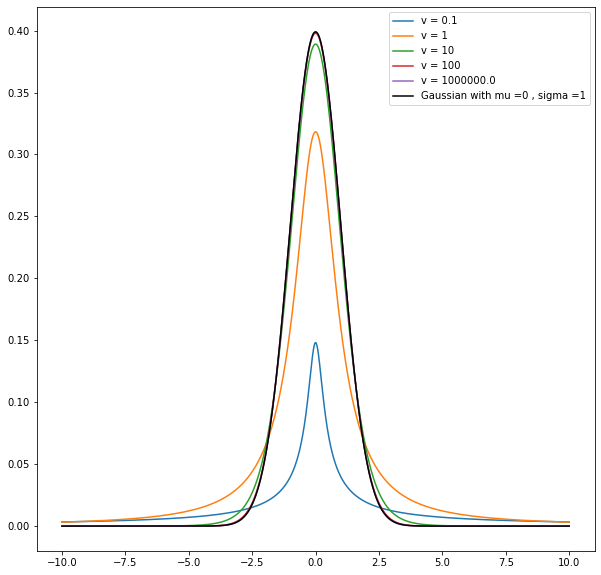

In [4]:
plt.figure(figsize=(10,10))
for df in DF:
    y = t.pdf(x, df= df, loc= 0, scale= 1)
    plt.plot(x, y, label = 'v = {}'.format(df))
    
y = norm.pdf(x, 0, 1)
plt.plot(x,y, label = 'Gaussian with mu =0 , sigma =1', color='black')
plt.legend()
plt.show()

In [5]:
from scipy.stats import beta

In [6]:
A = [1,5,10]
x = np.linspace(0, 1, 1000)

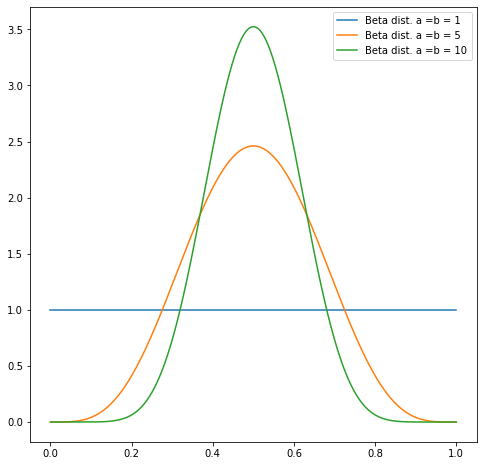

In [7]:
plt.figure(figsize=(8,8))
for a in A:
    y = beta.pdf(x, a= a, b = a)
    plt.plot(x, y, label = 'Beta dist. a =b = {}'.format(a))
plt.legend()
plt.show()

In [8]:
A = [1,5,10]

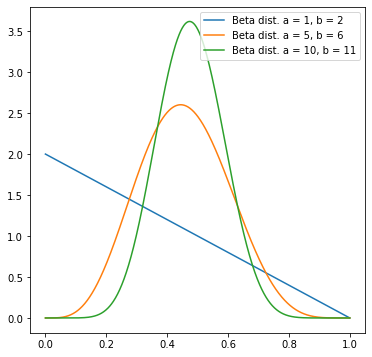

In [9]:
plt.figure(figsize=(6,6))
for a in A:
    y = beta.pdf(x, a= a, b = a+1)
    plt.plot(x, y, label = 'Beta dist. a = {}, b = {}'.format(a, a+1))
plt.legend()
plt.show()

# Practice 3

In [10]:
mu=0
std=np.sqrt(2)
num=30

In [11]:
N = norm(loc = mu, scale = std)
Sample = N.rvs(size=30)
print(Sample)

[-0.49461426 -2.00530942 -0.84998284  1.52672441 -0.29310097 -1.14959959
  3.23899593  0.53245307  0.01247714  1.01977962  2.47777286  2.5809171
 -0.90043716 -2.38718676 -0.35429476 -0.6417894   0.68433262 -0.11477949
  1.40694944 -0.46786505 -1.30866467 -1.01722643 -0.57000724  1.22836516
  0.92113169  0.25757973 -0.8478728  -0.16378738 -1.06950917 -0.15709279]


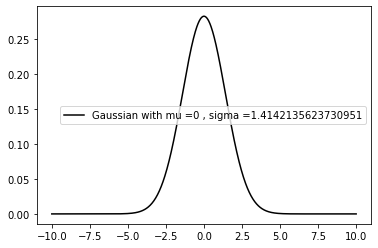

In [12]:
x = np.linspace(-10, 10, 1000)
y = norm.pdf(x, 0, std)
plt.plot(x,y, label = 'Gaussian with mu ={} , sigma ={}'.format(mu, std), color='black')
plt.legend()
plt.show()

In [13]:
# Maximum likelihood analytically:
mu_s = Sample.mean()
std_s = Sample.std()
mu_s, std_s

(0.03647861946263021, 1.2966495821461317)

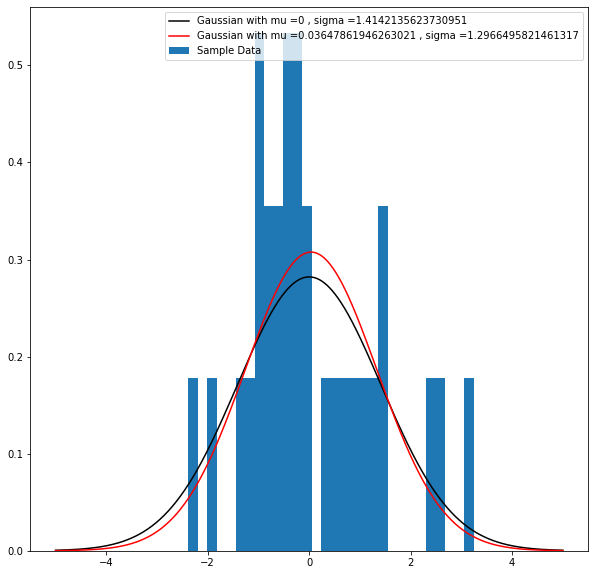

In [14]:
plt.figure(figsize=(10,10))
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, np.sqrt(2))
plt.plot(x,y, label = 'Gaussian with mu =0 , sigma ={}'.format(np.sqrt(2)), color='black')
plt.plot(x,norm.pdf(x, mu_s, std_s), label = 'Gaussian with mu ={} , sigma ={}'.format(mu_s, std_s), color='red')
plt.hist(Sample, bins=30, density=True, label = "Sample Data")
plt.legend()
plt.show()

In [15]:
from scipy.optimize import minimize

In [16]:
theta=np.array([0,1])

def gaussian_mle(theta):
    return -1*np.sum(np.log(norm.pdf(Sample, theta[0], theta[1])))

In [17]:
MLE_g1 = minimize(gaussian_mle, theta, method = 'BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: 50.361667
         Iterations: 7
         Function evaluations: 30
         Gradient evaluations: 10


In [18]:
MLE_g1.x

array([0.03647883, 1.29664966])

In [19]:
V = np.array([1,0,1])# V[0]= df, V[1] = loc, V[2] = scale
def t_mle(V):
    return -1*np.sum(np.log(t.pdf(Sample, df = V[0], loc= V[1], scale = V[2]))) 

In [20]:
MLE_t1 = minimize(t_mle, V, method = 'BFGS', options={'disp': True})

         Current function value: 50.359002
         Iterations: 27
         Function evaluations: 288
         Gradient evaluations: 69


In [21]:
MLE_t1['x']

array([4.84332430e+01, 2.00631684e-02, 1.26985564e+00])

In [22]:
MLE_g1.x

array([0.03647883, 1.29664966])

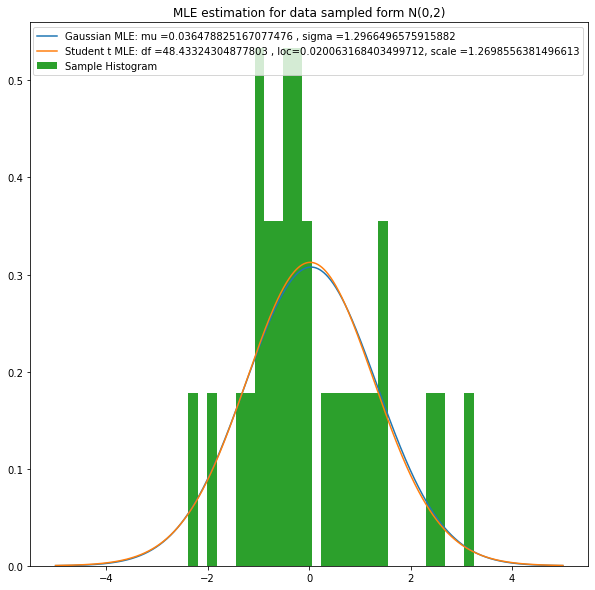

In [23]:
plt.figure(figsize=(10,10))
x = np.linspace(-5, 5, 1000)
y1 = norm.pdf(x, 0, np.sqrt(2))
y3 = t.pdf(x, df = MLE_t1.x[0], loc= MLE_t1.x[1], scale = MLE_t1.x[2])
y2 = norm.pdf(x, loc = MLE_g1.x[0], scale = MLE_g1.x[1])
#plt.plot(x, y1, label = 'Orginal Gaussian with mu =0 , sigma ={}'.format(np.sqrt(2)))
, label = 'Gaussian MLE: mu ={} , sigma ={}'.format(MLE_g1.x[0], MLE_g1.x[1]))
plt.plot(x,y3, label = 'Student t MLE: df ={} , loc={}, scale ={}'.format(MLE_t1.x[0], MLE_t1.x[1], MLE_t1.x[2]))

#plt.plot(x,norm.pdf(x, mu_s, std_s), label = 'Gaussian with mu ={} , sigma ={}'.format(mu_s, std_s), color='red')
plt.hist(Sample, bins=30, density=True, label = 'Sample Histogram')
plt.legend()
plt.title('MLE estimation for data sampled form N(0,2)')
plt.show()

In [24]:
Noisy_sample = np.append(Sample, [8,9,10])

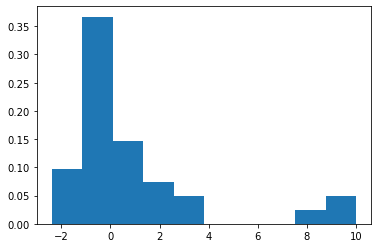

In [25]:
plt.hist(Noisy_sample, bins=10, density=True)
#plt.legend()
plt.show()

In [26]:
theta=np.array([0,1])
V = np.array([1,0,1])

def gaussian_mle2(theta):
    return -1*np.sum(np.log(norm.pdf(Noisy_sample, theta[0], theta[1])))
def t_mle2(V):
    return -1*np.sum(np.log(t.pdf(Noisy_sample, df = V[0], loc= V[1], scale = V[2])))

MLE_gn = minimize(gaussian_mle2, theta, method = 'BFGS', options={'disp': True})
MLE_tn = minimize(t_mle2, V, method = 'BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: 81.601676
         Iterations: 13
         Function evaluations: 45
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 71.217505
         Iterations: 7
         Function evaluations: 40
         Gradient evaluations: 10


In [27]:
MLE_gn.x

array([0.85134409, 2.86864431])

In [28]:
MLE_tn.x

array([ 1.37734271, -0.20975451,  0.94238456])

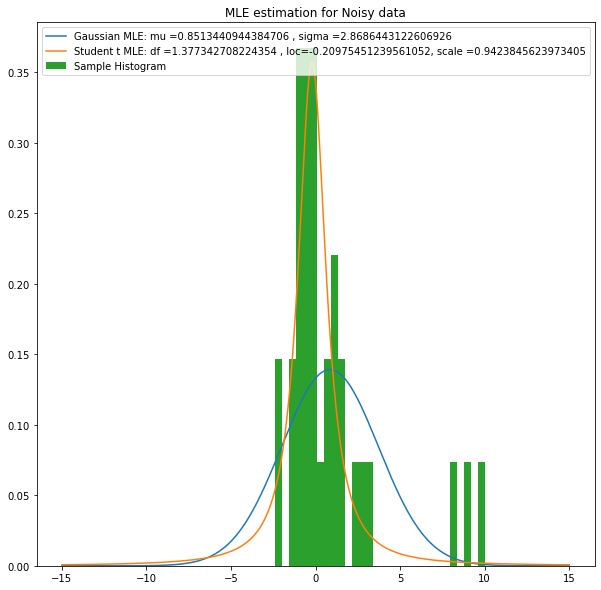

In [29]:
plt.figure(figsize=(10,10))
x = np.linspace(-15, 15, 1000)
y1 = norm.pdf(x, 0, np.sqrt(2))
y3 = t.pdf(x, df = MLE_tn.x[0], loc= MLE_tn.x[1], scale = MLE_tn.x[2])
y2 = norm.pdf(x, loc = MLE_gn.x[0], scale = MLE_gn.x[1])
#plt.plot(x, y1, label = 'Orginal Gaussian with mu =0 , sigma ={}'.format(np.sqrt(2)))
plt.plot(x, y2, label = 'Gaussian MLE: mu ={} , sigma ={}'.format(MLE_gn.x[0], MLE_gn.x[1]))
plt.plot(x,y3, label = 'Student t MLE: df ={} , loc={}, scale ={}'.format(MLE_tn.x[0], MLE_tn.x[1], MLE_tn.x[2]))

#plt.plot(x,norm.pdf(x, mu_s, std_s), label = 'Gaussian with mu ={} , sigma ={}'.format(mu_s, std_s), color='red')
plt.hist(Noisy_sample, bins=30, density=True, label = 'Sample Histogram')
plt.legend()
plt.title('MLE estimation for Noisy data')
plt.show()